# Topic Modeling for youth alcohol consumption - Bertopic

In [1]:
# parameters
nr_of_articles = 10000
startyear = 2000 
nr_topics = 11
min_topic_size = 25

# hyperparameter tuning of Bertopic: https://maartengr.github.io/BERTopic/getting_started/parameter%20tuning/parametertuning.html

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)


## Data

Searchstring 1 Web of Science: alcohol* AND (adolescen* OR youth OR minor OR underage*) AND (factors OR determinant* OR Cause* OR influence* OR Predictor*)
 
zoeken op Topic  (--> Searches title, abstract and author keywords.)

Dit geeft: n = 23.260 (artikels)

inclusie/exclusiecriteria
Refine: open acces (n=11.605)
Refine: english (n=11.260)
Refine: article + early acces (n = 10,436) --> alle andere bronnen geëxcludeerd op deze wijze

Sort by relevance. 

Searchstring 2 Web of Science: (alcohol*) AND (adolescen* OR youth OR minor OR underage*) AND (factor* OR determinant* OR Cause* OR influence* OR Predictor*)
 
zoeken op Title + Abstract

languages: english,
open acces, 
Document typers: article
Publication Year >= 2000





In [3]:
art1 = pd.read_excel('datasets/savedrecs-0001-1000.xls')
art2 = pd.read_excel('datasets/savedrecs-1001-2000.xls')
art3 = pd.read_excel('datasets/savedrecs-2001-3000.xls')
art4 = pd.read_excel('datasets/savedrecs-3001-4000.xls')
art5 = pd.read_excel('datasets/savedrecs-4001-5000.xls')
art6 = pd.read_excel('datasets/savedrecs-5001-5596.xls')    
articles = pd.concat([art1, art2, art3, art4, art5, art6], ignore_index=True, axis=0)

In [4]:
articles = articles[articles['Publication Year'] >= startyear]

In [5]:
len(articles)

5597

In [6]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 72 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Publication Type            5597 non-null   object 
 1   Authors                     5597 non-null   object 
 2   Book Authors                0 non-null      float64
 3   Book Editors                5 non-null      object 
 4   Book Group Authors          0 non-null      float64
 5   Author Full Names           5597 non-null   object 
 6   Book Author Full Names      0 non-null      float64
 7   Group Authors               104 non-null    object 
 8   Article Title               5597 non-null   object 
 9   Source Title                5597 non-null   object 
 10  Book Series Title           5 non-null      object 
 11  Book Series Subtitle        0 non-null      float64
 12  Language                    5597 non-null   object 
 13  Document Type               5597 

## Preprocessing

In [7]:
print(len(articles))
articles.drop_duplicates(subset=['Article Title', 'Abstract'], inplace=True)
print(len(articles))

5597
5596


In [8]:
art = articles
art.head(2)

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,Book Series Title,Book Series Subtitle,Language,Document Type,Conference Title,Conference Date,Conference Location,Conference Sponsor,Conference Host,Author Keywords,Keywords Plus,Abstract,Addresses,Affiliations,Reprint Addresses,Email Addresses,Researcher Ids,ORCIDs,Funding Orgs,Funding Name Preferred,Funding Text,Cited References,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases",180 Day Usage Count,Since 2013 Usage Count,Publisher,Publisher City,Publisher Address,ISSN,eISSN,ISBN,Journal Abbreviation,Journal ISO Abbreviation,Publication Date,Publication Year,Volume,Issue,Part Number,Supplement,Special Issue,Meeting Abstract,Start Page,End Page,Article Number,DOI,DOI Link,Book DOI,Early Access Date,Number of Pages,WoS Categories,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Shin, YJ; Lee, JK; Lu, Y; Hecht, ML",NaN,NaN,NaN,"Shin, YoungJu; Lee, Jeong-Kyu; Lu, Yu; Hecht, Michael L.",NaN,NaN,Exploring Parental Influence on the Progression of Alcohol Use in Mexican-Heritage Youth: a Latent Transition Analysis,PREVENTION SCIENCE,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,Youth substance use; Latent class analysis; Latent transition analysis; Targeted parent-child communication; Parental monitoring,SUBSTANCE USE; DRUG-USE; CHILD COMMUNICATION; FAMILY-STRUCTURE; SAS PROCEDURE; LATINO YOUTH; SELF-ESTEEM; ADOLESCENTS; RISK; MARIJUANA,"Mexican-heritage youth are members of the fastest growing minority group and are at particular risk for substance use including alcohol consumption. Youth face numerous risk factors including positive descriptions of substance use on media and peer offers that are potentially ameliorated by parental anti-substance use socialization efforts. Guided by primary socialization theory and the theory of planned behavior, the present study posited eight research questions to identify discrete subgroups/patterns of Mexican-heritage youth alcohol use behavior and parental influence on youth outcomes. Longitudinal survey data (n = 1147) from youth in 29 public schools located in Phoenix, Arizona, were collected over 3 years. Latent class and transition analyses identified four discrete subgroups characterized by response patterns of alcohol use behaviors and perceptions in Mexican-heritage youth: (1) non-drinker, (2) potential drinker, (3) experimenter, and (4) regular drinker. Targeted parent-child communication about alcohol and parental monitoring were found to be significant predictors for youth alcohol use. Research implications and future directions are suggested.","[Shin, YoungJu] Indiana Univ Purdue Univ, Dept Commun Studies, 425 Univ Blvd,Cavanaugh Hall 309, Indianapolis, IN 46202 USA; [Lee, Jeong-Kyu] Univ Wollongong, Ctr Hlth Initiat, Wollongong, NSW, Australia; [Lu, Yu; Hecht, Michael L.] Penn State Univ, Dept Commun Arts & Sci, University Pk, PA 16802 USA",Indiana University System; Indiana University-Purdue University Indianapolis; University of Wollongong; Pennsylvania Commonwealth System of Higher Education (PCSHE); Pennsylvania State University; Pennsylvania State University - University Park,"Shin, YJ (corresponding author), Indiana Univ Purdue Univ, Dept Commun Studies, 425 Univ Blvd,Cavanaugh Hall 309, Indianapolis, IN 46202 USA.",younshin@iupui.edu; jklee@uow.edu.au; yxl235@psu.edu; mlh10@psu.edu,"Lu, Yu/AGB-5690-2022; Shin, YoungJu/ABA-1000-2020; Lu, Yu/AAA-3190-2020","Lu, Yu/0000-0002-5128-6868; Shin, YoungJu/0000-0001-6751-8064",National Institute on Drug Abuse [R01DA005629],National Institute on Drug Abuse(United States Department of Health & Human ServicesNational Institutes of Health (NIH) - USANIH National Institute on Drug Abuse (NIDA)),"This manuscript was supported by Grant Numbe

In [9]:
art['text'] = art['Article Title'].fillna('') + ' ' + art['Abstract'].fillna('')
art.head(2)


,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,Book Series Title,Book Series Subtitle,Language,Document Type,Conference Title,Conference Date,Conference Location,Conference Sponsor,Conference Host,Author Keywords,Keywords Plus,Abstract,Addresses,Affiliations,Reprint Addresses,Email Addresses,Researcher Ids,ORCIDs,Funding Orgs,Funding Name Preferred,Funding Text,Cited References,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases",180 Day Usage Count,Since 2013 Usage Count,Publisher,Publisher City,Publisher Address,ISSN,eISSN,ISBN,Journal Abbreviation,Journal ISO Abbreviation,Publication Date,Publication Year,Volume,Issue,Part Number,Supplement,Special Issue,Meeting Abstract,Start Page,End Page,Article Number,DOI,DOI Link,Book DOI,Early Access Date,Number of Pages,WoS Categories,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record,text
0,J,"Shin, YJ; Lee, JK; Lu, Y; Hecht, ML",NaN,NaN,NaN,"Shin, YoungJu; Lee, Jeong-Kyu; Lu, Yu; Hecht, Michael L.",NaN,NaN,Exploring Parental Influence on the Progression of Alcohol Use in Mexican-Heritage Youth: a Latent Transition Analysis,PREVENTION SCIENCE,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,Youth substance use; Latent class analysis; Latent transition analysis; Targeted parent-child communication; Parental monitoring,SUBSTANCE USE; DRUG-USE; CHILD COMMUNICATION; FAMILY-STRUCTURE; SAS PROCEDURE; LATINO YOUTH; SELF-ESTEEM; ADOLESCENTS; RISK; MARIJUANA,"Mexican-heritage youth are members of the fastest growing minority group and are at particular risk for substance use including alcohol consumption. Youth face numerous risk factors including positive descriptions of substance use on media and peer offers that are potentially ameliorated by parental anti-substance use socialization efforts. Guided by primary socialization theory and the theory of planned behavior, the present study posited eight research questions to identify discrete subgroups/patterns of Mexican-heritage youth alcohol use behavior and parental influence on youth outcomes. Longitudinal survey data (n = 1147) from youth in 29 public schools located in Phoenix, Arizona, were collected over 3 years. Latent class and transition analyses identified four discrete subgroups characterized by response patterns of alcohol use behaviors and perceptions in Mexican-heritage youth: (1) non-drinker, (2) potential drinker, (3) experimenter, and (4) regular drinker. Targeted parent-child communication about alcohol and parental monitoring were found to be significant predictors for youth alcohol use. Research implications and future directions are suggested.","[Shin, YoungJu] Indiana Univ Purdue Univ, Dept Commun Studies, 425 Univ Blvd,Cavanaugh Hall 309, Indianapolis, IN 46202 USA; [Lee, Jeong-Kyu] Univ Wollongong, Ctr Hlth Initiat, Wollongong, NSW, Australia; [Lu, Yu; Hecht, Michael L.] Penn State Univ, Dept Commun Arts & Sci, University Pk, PA 16802 USA",Indiana University System; Indiana University-Purdue University Indianapolis; University of Wollongong; Pennsylvania Commonwealth System of Higher Education (PCSHE); Pennsylvania State University; Pennsylvania State University - University Park,"Shin, YJ (corresponding author), Indiana Univ Purdue Univ, Dept Commun Studies, 425 Univ Blvd,Cavanaugh Hall 309, Indianapolis, IN 46202 USA.",younshin@iupui.edu; jklee@uow.edu.au; yxl235@psu.edu; mlh10@psu.edu,"Lu, Yu/AGB-5690-2022; Shin, YoungJu/ABA-1000-2020; Lu, Yu/AAA-3190-2020","Lu, Yu/0000-0002-5128-6868; Shin, YoungJu/0000-0001-6751-8064",National Institute on Drug Abuse [R01DA005629],National Institute on Drug Abuse(United States Department of Health & Human ServicesNational Institutes of Health (NIH) - USANIH National Institute on Drug Abuse (NIDA)),"This manuscript was supported by Grant 

In [10]:
# Lemmatization
import nltk
import string
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
nltk.download('all')   # download wordlist
from nltk.stem import WordNetLemmatizer
english_stopwords = set(nltk.corpus.stopwords.words('english'))
punctuation = set(string.punctuation)

art['text'] = art['text'].str.replace(r'\b\w{1,3}\b', '') # remove words with less than 3 characters
art['text'] = art['text'].str.replace(r'\d+', '') # remove numbers


lemmatizer = WordNetLemmatizer() 
# tgw = ['alcohol','substance','youth','adolescent','factor','factors','among']  # topic general words to be excluded
tgw = ['alcohol','among']  # topic general words to be excluded

def lemmatizing_en(text):
    word_tokens = word_tokenize(text.lower()) 
    word_tokens = [word for word in word_tokens if word not in punctuation]
    word_tokens = [word for word in word_tokens if word.isalpha()]
    word_tokens = [word for word in word_tokens if word not in english_stopwords]
    word_tokens = [word for word in word_tokens if word not in tgw]
    result = [lemmatizer.lemmatize(x) for x in word_tokens]
    seperator = ' '
    return seperator.join(result)  # return list and string

art['text'] = [lemmatizing_en(s) for s in art['text']]

for word in tgw:
    art['text'] = art['text'].str.replace(word, '') # remove tgw words

art['text'] = art['text'].str.replace(r'\b\w{1,3}\b', '') # remove lemmas with less than 3 characters


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jcor864\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\jcor864\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\jcor864\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\jcor864\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\jcor864\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[

In [11]:
art['text'].iloc[0]

'exploring parental influence progression use youth latent transition analysis youth member fastest growing minority group particular risk substance use including consumption youth face numerous risk factor including positive description substance use medium peer offer potentially ameliorated parental use socialization effort guided primary socialization theory theory planned behavior present study posited eight research question identify discrete youth use behavior parental influence youth outcome longitudinal survey data n youth public school located phoenix arizona collected year latent class transition analysis identified four discrete subgroup characterized response pattern use behavior perception youth potential drinker experimenter regular drinker targeted communication parental monitoring found significant predictor youth use research implication future direction suggested'

## Bertopic

In [12]:
art.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5596 entries, 0 to 5596
Data columns (total 73 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Publication Type            5596 non-null   object 
 1   Authors                     5596 non-null   object 
 2   Book Authors                0 non-null      float64
 3   Book Editors                5 non-null      object 
 4   Book Group Authors          0 non-null      float64
 5   Author Full Names           5596 non-null   object 
 6   Book Author Full Names      0 non-null      float64
 7   Group Authors               104 non-null    object 
 8   Article Title               5596 non-null   object 
 9   Source Title                5596 non-null   object 
 10  Book Series Title           5 non-null      object 
 11  Book Series Subtitle        0 non-null      float64
 12  Language                    5596 non-null   object 
 13  Document Type               5596 non-n

In [13]:
docs = art['text']

In [23]:

from bertopic import BERTopic

# Pre-calculate embeddings
# from sentence_transformers import SentenceTransformer
# embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
# embeddings = embedding_model.encode(docs, show_progress_bar=True)


# dimensionality reduction
# from umap import UMAP
import umap.umap_ as UMAP
umap_model = UMAP.UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)    # Prevent Stochastic Behavior with random_state

# clustering (controlling number of topics)
# from hdbscan import HDBSCAN
# hdbscan_model = HDBSCAN(min_cluster_size=150, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

# Improve topic representations
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model = CountVectorizer(stop_words="english", ngram_range=(1, 2))

# Fine-tune your topic representations
from bertopic.representation import KeyBERTInspired
representation_model = KeyBERTInspired()

topic_model = BERTopic(

  # Pipeline models
  # embedding_model=embedding_model,
  umap_model=umap_model,
  # hdbscan_model=hdbscan_model,
  vectorizer_model=vectorizer_model,
  representation_model=representation_model,

  # Hyperparameters
  nr_topics=nr_topics,
  top_n_words=10,
  verbose=True
)

topics, probs = topic_model.fit_transform(docs)



2025-05-05 16:37:27,451 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 175/175 [01:44<00:00,  1.68it/s]
2025-05-05 16:39:13,442 - BERTopic - Embedding - Completed ✓
2025-05-05 16:39:13,443 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-05 16:39:23,451 - BERTopic - Dimensionality - Completed ✓
2025-05-05 16:39:23,452 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-05 16:39:23,633 - BERTopic - Cluster - Completed ✓
2025-05-05 16:39:23,634 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-05-05 16:39:26,552 - BERTopic - Representation - Completed ✓
2025-05-05 16:39:26,558 - BERTopic - Topic reduction - Reducing number of topics
2025-05-05 16:39:26,564 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-05 16:39:31,754 - BERTopic - Representation - Completed ✓
2025-05-05 16:39:31,765 - BERTopic - Topic reduction - Re

In [24]:
topic_model.save(path=".", serialization="safetensors", save_ctfidf=True)

In [25]:
nr_topics

11

In [26]:
probs[:20]

array([0.        , 0.        , 0.86817102, 0.        , 0.        ,
       1.        , 1.        , 0.        , 0.93935844, 0.92708201,
       0.83470609, 0.787115  , 0.22766357, 0.        , 0.        ,
       1.        , 0.56335879, 0.66178954, 0.        , 0.        ])

In [27]:
opt_nr_topics = len(set(topics))
opt_nr_topics

11

In [29]:
tm = topic_model.get_topic_info()[['Topic', 'Count', 'Name','Representation']]
tm

,Topic,Count,Name,Representation
0,-1,2010,-1_drug use_substance use_adolescent_adolescence,"[drug use, substance use, adolescent, adolescence, marijuana, youth, cannabis, drug, prevalence, mental health]"
1,0,2407,0_substance use_adolescent_adolescence_marijuana,"[substance use, adolescent, adolescence, marijuana, prevalence, youth, adulthood, cannabis, smoking, tobacco]"
2,1,397,1_ethanol exposure_ethanol_binge drinking_adolescence,"[ethanol exposure, ethanol, binge drinking, adolescence, adolescent, drinking, adulthood, adolescent adult, prenatal exposure, amygdala]"
3,2,214,2_sexual risk_sexually transmitted_condom use_sexual behavior,"[sexual risk, sexually transmitted, condom use, sexual behavior, hiv, sexual behaviour, sexual intercourse, hiv infection, condom, sexual initiation]"
4,3,201,3_fatty liver_liver disease_metabolic syndrome_hepatic steatosis,"[fatty liver, liver disease, metabolic syndrome, hepatic steatosis, cholesterol, triglyceride, obesity, prevalence, fatty, obese]"
5,4,134,4_trauma_acute intoxication_injury_severity,"[trauma, acute intoxication, injury, severity, accident, adolescent, intoxication, fracture, mortality, risk factor]"
6,5,121,5_fermentation_phenolic_ethanol_wine,"[fermentation, phenolic, ethanol, wine, grape, yeast, acetate, spectrometry, ethyl, fatty acid]"
7,6,61,6_adolescent sleep_sleep disturbance_sleep difficulty_sleep problem,"[adolescent sleep, sleep disturbance, sleep difficulty, sleep problem, sleep loss, sleep quality, sleep duration, daytime sleepiness, sleepiness, relationship sleep]"
8,7,19,7_ischemic stroke_atrial fibrillation_stroke_cardiac death,"[ischemic stroke, atrial fibrillation, stroke, cardiac death, minor stroke, echocardiography, oral anticoagulant, ischemic attack, anticoagulant, anticoagulation]"
9,8,18,8_bone health_osteoporosis_bone mineral_fracture risk,"[bone health, osteoporosis, bone mineral, fracture risk, bone accrual, bone mass, bone accretion, peak bone, hip femoral, bone]"


In [30]:
tm.to_excel('../topics.xlsx', index=False)

## Attaching Discovered Topic Labels to Original Articles

In [32]:
art['Topic'] = topics
art['Prob'] = probs
# art = art[(art['Topic'] >= 0)]   # -1 refers to all outliers and should typically be ignored. 
art = art.drop(columns=['text'])

In [33]:
art[art['Topic'] == 1][['Article Title','Abstract','Prob']][:10]

,Article Title,Abstract,Prob
21,"Which Matters Most? Demographic, Neuropsychological, Personality, and Situational Factors in Long-Term Marijuana and Alcohol Trajectories for Justice-Involved Male Youth","Justice-involved youth have high rates of alcohol and marijuana use. However, little is known about what may drive these rates over time. Using a large-scale (N = 1,056; 41.4% African American, 33.5% Hispanic) longitudinal study with strong retention (M retention = 90% over Years 1-7), we utilized random-effects regression to determine the comparative contribution of four sets of factors in justice-involved males' patterns of marijuana and heavy alcohol use (number of times drunk) over 7 years of follow-up: demographic, personality, situational, and neuropsychological factors. Across both marijuana and heavy alcohol use models, three factors were particularly strong contributors to lower rates of substance use: (a) Hispanic ethnicity, (b) less exposure (street) time, and (c) better impulse control. Similarly, two factors were strong contributors to increased rates of marijuana and heavy alcohol use: (a) delinquent peers and (b) family member arrest. Together, these findings indicate the relative superiority of these independent variables over other categories (i.e., neuropsychological factors) in predicting high-risk youths' long-term (7-year) rates of substance use. These findings also suggest the importance of evaluating the connection of these areas for high-risk, adjudicated youth.",0.348898
41,Neural Predictors of Initiating Alcohol Use During Adolescence,"Objective: Underage drinking is widely recognized as a leading public health and social problem for adolescents in the United States. Being able to identify at-risk adolescents before they initiate heavy alcohol use could have important clinical and public health implications; however, few investigations have explored individual-level precursors of adolescent substance use. This prospective investigation used machine learning with demographic, neurocognitive, and neuroimaging data in substance-naive adolescents to identify predictors of alcohol use initiation by age 18. Method: Participants (N=137) were healthy substancenaive adolescents (ages 12-14) who underwent neuropsychological testing and structural and functional magnetic resonance imaging (sMRI and fMRI), and then were followed annually. By age 18, 70 youths (51%) initiated moderate to heavy alcohol use, and 67 remained nonusers. Random forest classification models identified the most important predictors of alcohol use from a large set of demographic, neuropsychological, sMRI, and fMRI variables. Results: Random forest models identified 34 predictors contributing to alcohol use by age 18, including several demographic and behavioral factors (being male, higher socioeconomic status, early dating, more externalizing behaviors, positive alcohol expectancies), worse executive functioning, and thinner cortices and less brain activation in diffusely distributed regions of the brain. Conclusions: Incorporating a mix of demographic, behavioral, neuropsychological, and neuroimaging data may be the best strategy for identifying youths at risk for initiating alcohol use during adolescence. The identified risk factors will be useful for alcohol prevention efforts and in research to address brain mechanisms that may contribute to early drinking.",0.861181
109,Atypical neural activity during inhibitory processing in substance-naive youth who later experience alcohol-induced blackouts,"Background: Alcohol-induced blackouts are associated with the development of alcohol abuse and dependence, so it is important to consider potential neurobiological risk factors for experiencing this problem prior to the onset of substance use. This study examines whether neural activity during inhibitory processing might be atypical in substance-naive youth who later experience alcohol-induced blackouts. Methods: We examined inhibitory process

## Number of articles per topic and per year

In [34]:
# pivot table year x topic --> count

pvt = pd.pivot_table(art, columns="Topic", index="Publication Year", values='Abstract',aggfunc='count', margins=True).fillna(0).astype(int)
pvt

Topic,-1,0,1,2,3,4,5,6,7,8,9,All
Publication Year,,,,,,,,,,,,
2000,11,8,0,1,1,1,0,0,0,2,0,24
2001,10,14,0,1,1,2,2,1,0,0,0,31
2002,13,13,0,3,1,0,3,2,0,1,0,36
2003,12,10,2,0,1,0,2,0,1,0,0,28
2004,9,12,1,0,0,0,0,2,0,0,0,24
2005,11,16,2,1,2,2,1,1,0,0,0,36
2006,24,32,2,2,2,3,1,0,0,1,0,67
2007,39,44,4,1,4,0,1,0,0,0,0,93
2008,53,66,8,8,5,0,1,0,0,0,2,143


In [35]:
pvt.to_excel('../pvt.xlsx')

### Time trends

In [36]:
pvt1 = pvt.reset_index()
pvt2 = pvt1.copy()

pvt1 = pvt1.drop('All',axis=1)
# pvt1 = pvt1[(pvt1['Publication Year'] != 2024)]
pvt1 = pvt1[:-1]
pvt1

Topic,Publication Year,-1,0,1,2,3,4,5,6,7,8,9
0,2000,11,8,0,1,1,1,0,0,0,2,0
1,2001,10,14,0,1,1,2,2,1,0,0,0
2,2002,13,13,0,3,1,0,3,2,0,1,0
3,2003,12,10,2,0,1,0,2,0,1,0,0
4,2004,9,12,1,0,0,0,0,2,0,0,0
5,2005,11,16,2,1,2,2,1,1,0,0,0
6,2006,24,32,2,2,2,3,1,0,0,1,0
7,2007,39,44,4,1,4,0,1,0,0,0,0
8,2008,53,66,8,8,5,0,1,0,0,0,2
9,2009,46,78,8,3,2,2,3,1,0,0,0


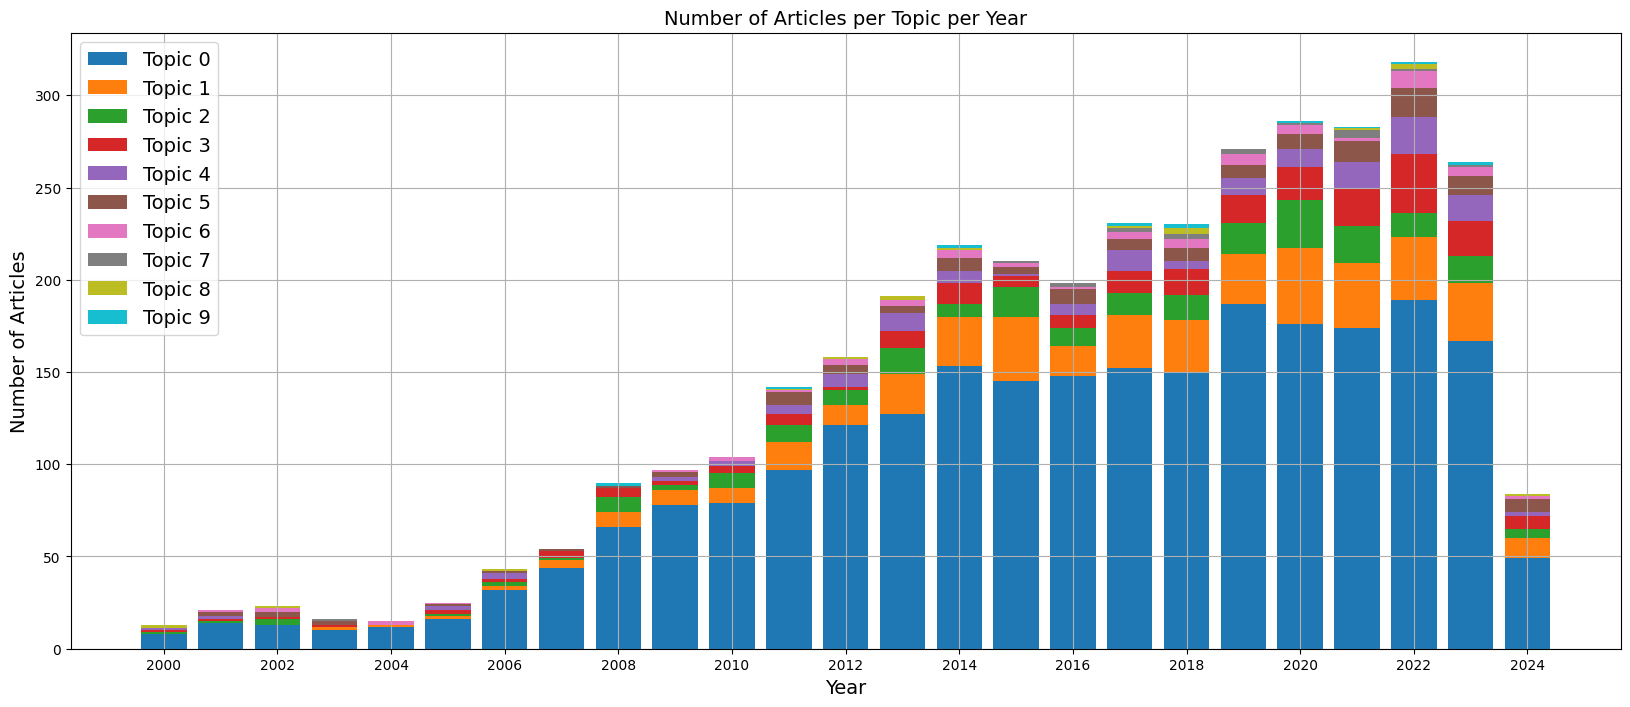

In [37]:
from matplotlib import pyplot as plt
# set figure size as 8 x 20 inches
plt.figure(figsize=(20,8))
bottom = np.zeros(pvt1.shape[0])
for i in range(0, opt_nr_topics-1):
    plt.bar(pvt1['Publication Year'], pvt1[i], bottom = bottom, label=f'Topic {i}')
    bottom += pvt1[i]

plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Topic per Year')
# set ticks on x as years
plt.xticks(np.arange(pvt1['Publication Year'].min(), pvt1['Publication Year'].max()+1, 2))
plt.legend()
plt.grid()
plt.show()

In [38]:
pvt2['All'] = pvt2['All'] - pvt2[-1]

for i in range(0, opt_nr_topics-1):
    pvt2[i] = pvt2[i] / pvt2['All']

pvt2 = pvt2.drop('All',axis=1)
# pvt2 = pvt2[(pvt2['Publication Year'] != 2024)]
pvt2 = pvt2[:-1]
pvt2



Topic,Publication Year,-1,0,1,2,3,4,5,6,7,8,9
0,2000,11,0.615385,0.000000,0.076923,0.076923,0.076923,0.000000,0.000000,0.000000,0.153846,0.000000
1,2001,10,0.666667,0.000000,0.047619,0.047619,0.095238,0.095238,0.047619,0.000000,0.000000,0.000000
2,2002,13,0.565217,0.000000,0.130435,0.043478,0.000000,0.130435,0.086957,0.000000,0.043478,0.000000
3,2003,12,0.625000,0.125000,0.000000,0.062500,0.000000,0.125000,0.000000,0.062500,0.000000,0.000000
4,2004,9,0.800000,0.066667,0.000000,0.000000,0.000000,0.000000,0.133333,0.000000,0.000000,0.000000
5,2005,11,0.640000,0.080000,0.040000,0.080000,0.080000,0.040000,0.040000,0.000000,0.000000,0.000000
6,2006,24,0.744186,0.046512,0.046512,0.046512,0.069767,0.023256,0.000000,0.000000,0.023256,0.000000
7,2007,39,0.814815,0.074074,0.018519,0.074074,0.000000,0.018519,0.000000,0.000000,0.000000,0.000000
8,2008,53,0.733333,0.088889,0.088889,0.055556,0.000000,0.011111,0.000000,0.000000,0.000000,0.022222
9,2009,46,0.804124,0.082474,0.030928,0.020619,0.020619,0.030928,0.010309,0.000000,0.000000,0.000000


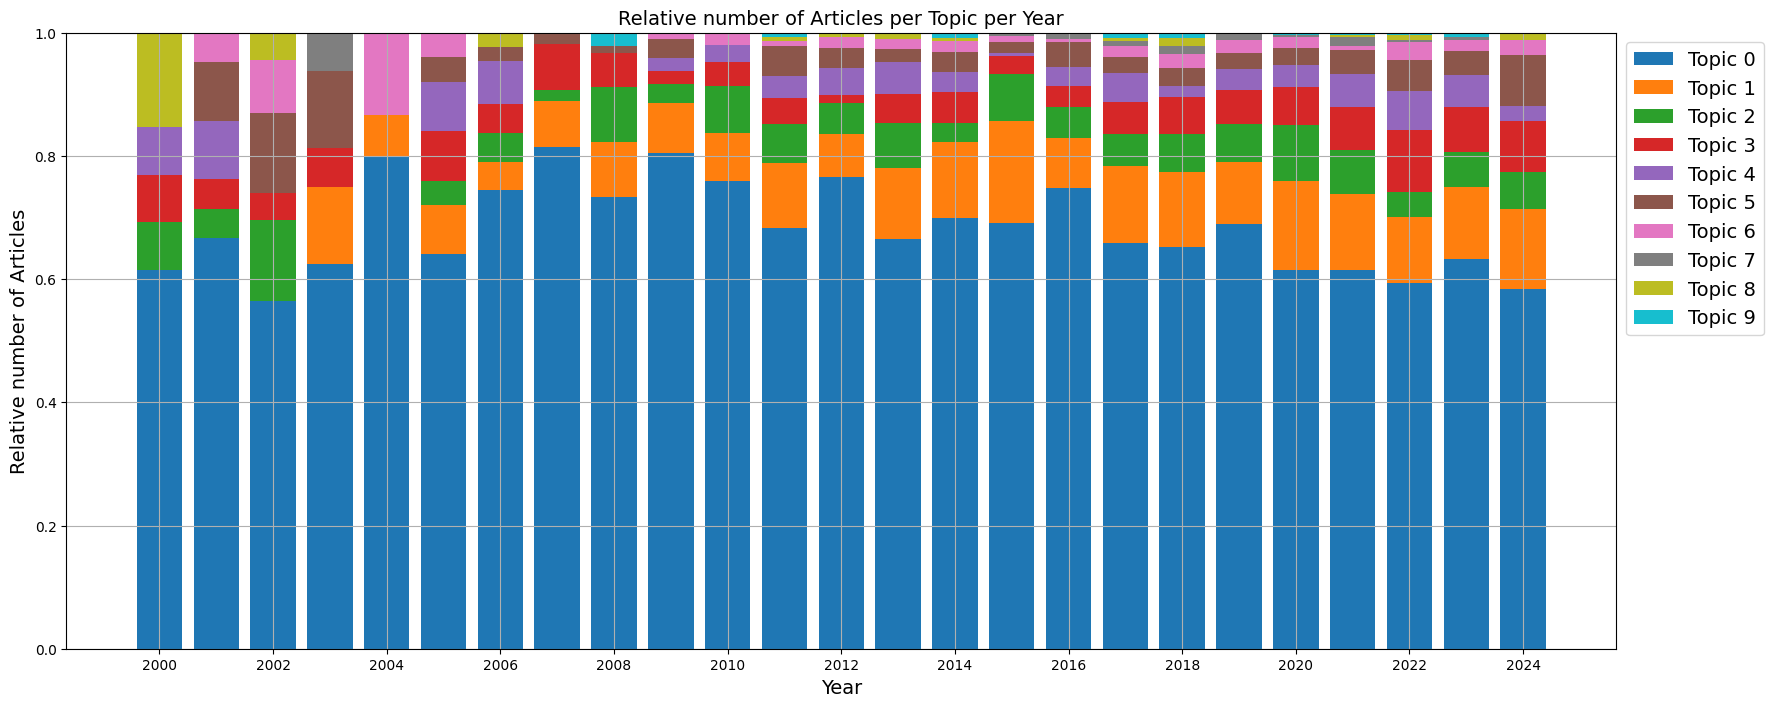

In [39]:
from matplotlib import pyplot as plt
# set figure size as 8 x 20 inches
plt.figure(figsize=(20,8))

bottom = np.zeros(pvt1.shape[0])
for i in range(0, opt_nr_topics-1):
    plt.bar(pvt2['Publication Year'], pvt2[i], bottom=bottom, label=f'Topic {i}')
    bottom += pvt2[i]

plt.xlabel('Year')
plt.ylabel('Relative number of Articles')
plt.title('Relative number of Articles per Topic per Year')
# set ticks on x as years
plt.xticks(np.arange(pvt2['Publication Year'].min(), pvt2['Publication Year'].max()+1, 2))
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.grid()
plt.show()

#### References

- LDA gensim vs scikit-learn: https://blog.devgenius.io/working-with-sklearn-latent-dirichlet-allocation-lda-topic-modeling-on-airline-sentiment-twitter-56dfacfd58bf  - 
- Perplexity score: https://medium.com/@iqra.bismi/topic-modelling-using-lda-fe81a2a806e0#:~:text=Perplexity%20is%20a%20commonly%20used,score%20indicates%20better%20model%20performance
- A Topic Modeling Comparison Between LDA, NMF, Top2Vec, and BERTopic to Demystify Twitter Posts: https://www.frontiersin.org/articles/10.3389/fsoc.2022.886498/full
- https://towardsdatascience.com/visualizing-topic-models-with-scatterpies-and-t-sne-f21f228f7b02
- https://maartengr.github.io/BERTopic/index.html 